In [6]:
%load_ext autoreload
%autoreload 2
import torch
from utils.dataset import image_data
from utils.model import UNetplusplus
from utils.train import model_setting
from matplotlib import pyplot as plt

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

data = image_data('./data/image_data/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
model = UNetplusplus(1,3)
train_model = model_setting(model,data,100,4,lr=1e-3,decay=1e-5,alpha=0.6)
train_model.dataset_split([0.8,0.15,0.05])

print('参数量',count_parameters(model))

参数量 1765740


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [1/100], Loss: 0.6114848984612359, Accuracy: 0.8157254854838053, Train Accuracy: 0.764927993218104
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [2/100], Loss: 0.5657412873374091, Accuracy: 0.8248671425713433, Train Accuracy: 0.8519304394721985
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [3/100], Loss: 0.6909137136406369, Accuracy: 0.7722305721706815, Train Accuracy: 0.8672356307506561


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [4/100], Loss: 0.585484590795305, Accuracy: 0.8344091839260526, Train Accuracy: 0.8774891297022501
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [5/100], Loss: 0.5312486886978149, Accuracy: 0.8709917068481445, Train Accuracy: 0.8880724608898163
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [6/100], Loss: 0.5321414950821135, Accuracy: 0.8754017617967393, Train Accuracy: 0.8953324258327484
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [7/100], Loss: 0.5136812064382765, Accuracy: 0.8847347365485297, Train Accuracy: 0.8978408475716909
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [8/100], Loss: 0.527280847231547, Accuracy: 0.8833592202928331, Train Accuracy: 0.9026266435782114


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [9/100], Loss: 0.5082138693994946, Accuracy: 0.88766082127889, Train Accuracy: 0.9032652676105499
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [10/100], Loss: 0.5149510701497396, Accuracy: 0.8862321641710069, Train Accuracy: 0.9048158129056295


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [11/100], Loss: 0.5044328371683756, Accuracy: 0.8892612457275391, Train Accuracy: 0.9054532547791799
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [12/100], Loss: 0.5112191521459155, Accuracy: 0.8878406948513455, Train Accuracy: 0.9051435093084971


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [13/100], Loss: 0.5072482178608576, Accuracy: 0.8886082967122396, Train Accuracy: 0.9053369164466858


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [14/100], Loss: 0.5062667942709393, Accuracy: 0.8885974354214139, Train Accuracy: 0.9057413836320242


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [15/100], Loss: 0.5206055177582635, Accuracy: 0.8843884468078613, Train Accuracy: 0.9054290850957235


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [16/100], Loss: 0.5032425589031644, Accuracy: 0.8902227083841959, Train Accuracy: 0.9047009547551473
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [17/100], Loss: 0.5058144761456383, Accuracy: 0.8888968891567655, Train Accuracy: 0.9051133294900259


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [18/100], Loss: 0.5020453515979979, Accuracy: 0.8907748328314887, Train Accuracy: 0.9054828882217407
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [19/100], Loss: 0.5048443857166502, Accuracy: 0.8890198071797689, Train Accuracy: 0.904548446337382


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [20/100], Loss: 0.509884720047315, Accuracy: 0.8882273038228353, Train Accuracy: 0.9053131639957428


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [21/100], Loss: 0.5215023308992386, Accuracy: 0.8840647803412544, Train Accuracy: 0.9062963823477427


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [22/100], Loss: 0.5021236058738496, Accuracy: 0.8914794921875, Train Accuracy: 0.9052143394947052
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [23/100], Loss: 0.5021388630072275, Accuracy: 0.8909265730116103, Train Accuracy: 0.9054815073808035


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [24/100], Loss: 0.5131297392977608, Accuracy: 0.8869747055901421, Train Accuracy: 0.904106467962265


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [25/100], Loss: 0.5104342616266675, Accuracy: 0.8892012172275119, Train Accuracy: 0.9046952625115713


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [26/100], Loss: 0.5048215455479093, Accuracy: 0.8897642559475369, Train Accuracy: 0.9056689043839773


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [27/100], Loss: 0.516312763094902, Accuracy: 0.8852519989013672, Train Accuracy: 0.9044957756996155


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [28/100], Loss: 0.5057325826750861, Accuracy: 0.8881204922993978, Train Accuracy: 0.904919852813085


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [29/100], Loss: 0.5076119932863448, Accuracy: 0.8886244032118056, Train Accuracy: 0.904604951540629


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [30/100], Loss: 0.513906662662824, Accuracy: 0.8869724273681641, Train Accuracy: 0.90494171778361


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [31/100], Loss: 0.503868172566096, Accuracy: 0.8899160491095649, Train Accuracy: 0.9052395522594452


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [32/100], Loss: 0.5043073942263921, Accuracy: 0.8894909222920736, Train Accuracy: 0.9049692948659261


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [33/100], Loss: 0.498016893863678, Accuracy: 0.8930767377217611, Train Accuracy: 0.9055198232332865
save model


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [34/100], Loss: 0.5024916927019755, Accuracy: 0.8903761439853244, Train Accuracy: 0.9057440956433614


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [35/100], Loss: 0.5046182854308022, Accuracy: 0.8898712793986002, Train Accuracy: 0.905346135298411


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [36/100], Loss: 0.5239074495103624, Accuracy: 0.8841606775919596, Train Accuracy: 0.9057451585928599


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [37/100], Loss: 0.5070091254181333, Accuracy: 0.8891949123806424, Train Accuracy: 0.9061438143253326


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [38/100], Loss: 0.5119573738839891, Accuracy: 0.8870553970336914, Train Accuracy: 0.9054869016011556


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [39/100], Loss: 0.5040676693121592, Accuracy: 0.890360779232449, Train Accuracy: 0.9045704702536265


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [40/100], Loss: 0.5171172221501669, Accuracy: 0.8855780495537652, Train Accuracy: 0.9040230512619019


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [41/100], Loss: 0.5105753375424279, Accuracy: 0.8889803886413574, Train Accuracy: 0.9059133728345236


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [42/100], Loss: 0.5062884274456236, Accuracy: 0.8898893992106119, Train Accuracy: 0.9059207439422607


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [43/100], Loss: 0.5179700503746668, Accuracy: 0.8858209186130099, Train Accuracy: 0.9045290152231852


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [44/100], Loss: 0.5022231224510405, Accuracy: 0.8898320727878146, Train Accuracy: 0.9055579404036204


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [45/100], Loss: 0.5121191889047623, Accuracy: 0.8873228496975369, Train Accuracy: 0.9053349395593008


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [46/100], Loss: 0.5058440317710241, Accuracy: 0.8900314966837565, Train Accuracy: 0.9052835802237192


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [47/100], Loss: 0.5043587767415576, Accuracy: 0.8905952241685655, Train Accuracy: 0.9051656325658163


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [48/100], Loss: 0.5112242251634598, Accuracy: 0.8881769180297852, Train Accuracy: 0.90559521317482


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [49/100], Loss: 0.5110196570555369, Accuracy: 0.8887263933817545, Train Accuracy: 0.9053970177968343


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [50/100], Loss: 0.5058271388212839, Accuracy: 0.8891127904256185, Train Accuracy: 0.904675563176473


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [51/100], Loss: 0.5087410426802106, Accuracy: 0.8880634837680392, Train Accuracy: 0.9041974643866221


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [52/100], Loss: 0.5184880064593421, Accuracy: 0.8841465844048394, Train Accuracy: 0.9048976500829061


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [53/100], Loss: 0.5060836921135584, Accuracy: 0.8894143634372287, Train Accuracy: 0.9059767127037048


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [54/100], Loss: 0.5097587787442737, Accuracy: 0.8883223533630371, Train Accuracy: 0.9053238828976949


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [55/100], Loss: 0.511861546172036, Accuracy: 0.887904167175293, Train Accuracy: 0.9060383836428324


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [56/100], Loss: 0.5115272733900282, Accuracy: 0.8865506384107802, Train Accuracy: 0.9057627518971761


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [57/100], Loss: 0.5118589666154649, Accuracy: 0.8874245749579536, Train Accuracy: 0.904947449763616


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [58/100], Loss: 0.5070474296808243, Accuracy: 0.8884708086649576, Train Accuracy: 0.9036420385042826


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [59/100], Loss: 0.5133910477161407, Accuracy: 0.8869352340698242, Train Accuracy: 0.9062754412492117


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [60/100], Loss: 0.49975644714302486, Accuracy: 0.8907218509250217, Train Accuracy: 0.9068260888258616


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [61/100], Loss: 0.5135900477568308, Accuracy: 0.8855882220798068, Train Accuracy: 0.905116985241572


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [62/100], Loss: 0.5101789964569939, Accuracy: 0.8878013292948405, Train Accuracy: 0.9057908952236176


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [63/100], Loss: 0.5084020412630506, Accuracy: 0.8881248368157281, Train Accuracy: 0.9058372577031454


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [64/100], Loss: 0.5020616932047738, Accuracy: 0.8900310728285048, Train Accuracy: 0.9055853287378947


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [65/100], Loss: 0.5039741430017683, Accuracy: 0.8900272581312392, Train Accuracy: 0.9054464797178904


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [66/100], Loss: 0.5028733693891101, Accuracy: 0.8910325898064507, Train Accuracy: 0.9048130412896475


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [67/100], Loss: 0.504185739490721, Accuracy: 0.8897503746880425, Train Accuracy: 0.9056515494982401


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [68/100], Loss: 0.5139249314864477, Accuracy: 0.8867617183261447, Train Accuracy: 0.9054129322369894


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [69/100], Loss: 0.5068196256955465, Accuracy: 0.8894813855489095, Train Accuracy: 0.9055941899617513


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [70/100], Loss: 0.516788919766744, Accuracy: 0.886330074734158, Train Accuracy: 0.904682457447052


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [71/100], Loss: 0.5058325462871127, Accuracy: 0.8888129658169217, Train Accuracy: 0.905827393134435


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [72/100], Loss: 0.5043421155876584, Accuracy: 0.8903735478719076, Train Accuracy: 0.9049713512261709


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [73/100], Loss: 0.5011789119905896, Accuracy: 0.8909722434149848, Train Accuracy: 0.905343234539032


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [74/100], Loss: 0.5122146705786387, Accuracy: 0.8870237138536241, Train Accuracy: 0.9055463274319967


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [75/100], Loss: 0.4999533063835568, Accuracy: 0.8915475739373101, Train Accuracy: 0.9053042232990265


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [76/100], Loss: 0.5099915497832828, Accuracy: 0.8881142404344347, Train Accuracy: 0.9055282374223074


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [77/100], Loss: 0.4986466318368912, Accuracy: 0.8923024601406522, Train Accuracy: 0.9055888454119364


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [78/100], Loss: 0.5018669101927016, Accuracy: 0.890812873840332, Train Accuracy: 0.9053351283073425


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [79/100], Loss: 0.5046368274423811, Accuracy: 0.8905903498331705, Train Accuracy: 0.904411256313324


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [80/100], Loss: 0.5073377837737402, Accuracy: 0.8879788716634115, Train Accuracy: 0.9053667684396108


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [81/100], Loss: 0.5082019451591704, Accuracy: 0.8895144992404513, Train Accuracy: 0.9056398173173269


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [82/100], Loss: 0.506578341126442, Accuracy: 0.8886100980970595, Train Accuracy: 0.9067175686359406


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [83/100], Loss: 0.5072755035426881, Accuracy: 0.8890784051683214, Train Accuracy: 0.9063851336638132


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [84/100], Loss: 0.5058905366394255, Accuracy: 0.8883552551269531, Train Accuracy: 0.9051542282104492


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [85/100], Loss: 0.5076238761345545, Accuracy: 0.8889467981126573, Train Accuracy: 0.9063273966312408


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [86/100], Loss: 0.5030030310153961, Accuracy: 0.8913394080268012, Train Accuracy: 0.9044514497121176


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [87/100], Loss: 0.509950664308336, Accuracy: 0.8883836534288194, Train Accuracy: 0.9058862229188284


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [88/100], Loss: 0.5033052431212531, Accuracy: 0.8906424840291342, Train Accuracy: 0.9059111674626669


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [89/100], Loss: 0.5178152422110239, Accuracy: 0.8850503497653537, Train Accuracy: 0.9050032993157705


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [90/100], Loss: 0.5115254786279466, Accuracy: 0.8865345319112142, Train Accuracy: 0.9061422348022461


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [91/100], Loss: 0.5044477664762073, Accuracy: 0.8904521200391982, Train Accuracy: 0.9056363602479299


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [92/100], Loss: 0.5071243329180611, Accuracy: 0.8888993263244629, Train Accuracy: 0.9046501517295837


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [93/100], Loss: 0.5074651506212022, Accuracy: 0.8889203071594238, Train Accuracy: 0.9056695898373922


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [94/100], Loss: 0.5034271511766646, Accuracy: 0.8902380731370714, Train Accuracy: 0.9052111705144247


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [95/100], Loss: 0.514381671945254, Accuracy: 0.8870064417521158, Train Accuracy: 0.90592293938001


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [96/100], Loss: 0.5066497309340371, Accuracy: 0.890290896097819, Train Accuracy: 0.9042737483978271


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [97/100], Loss: 0.5064312981234657, Accuracy: 0.8895913230048286, Train Accuracy: 0.905344953139623


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [98/100], Loss: 0.507454021109475, Accuracy: 0.8893409834967719, Train Accuracy: 0.9046489397684733


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [99/100], Loss: 0.5062536266114976, Accuracy: 0.8890859285990397, Train Accuracy: 0.9054101407527924


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [100/100], Loss: 0.5183836420377096, Accuracy: 0.8853624131944444, Train Accuracy: 0.9051993687947592


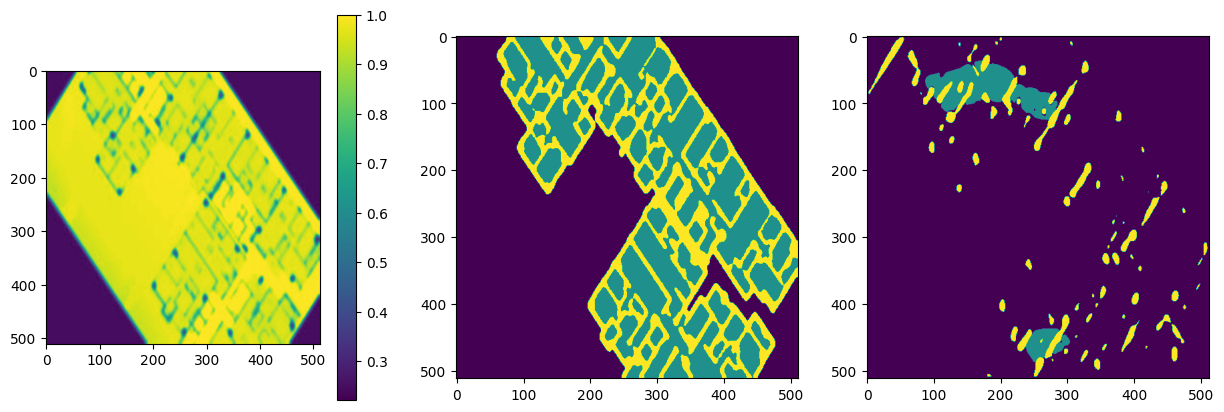

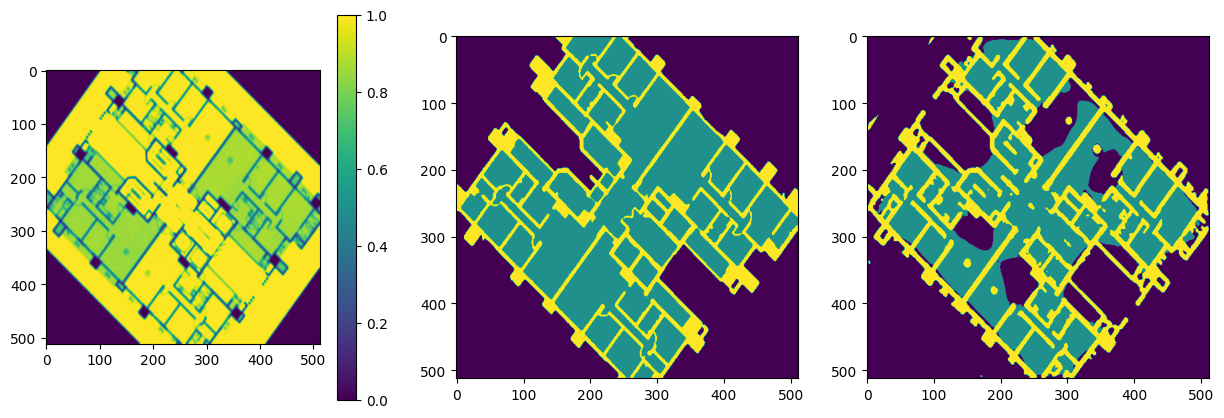

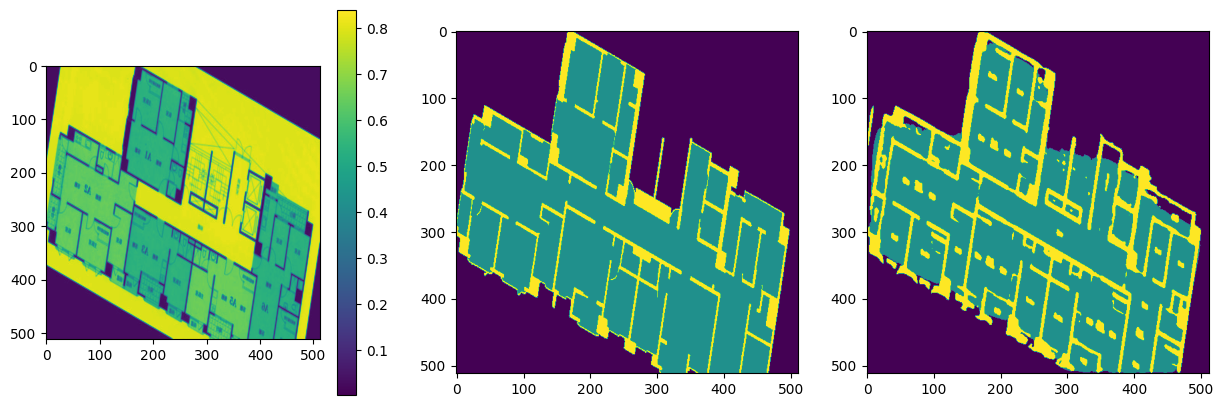

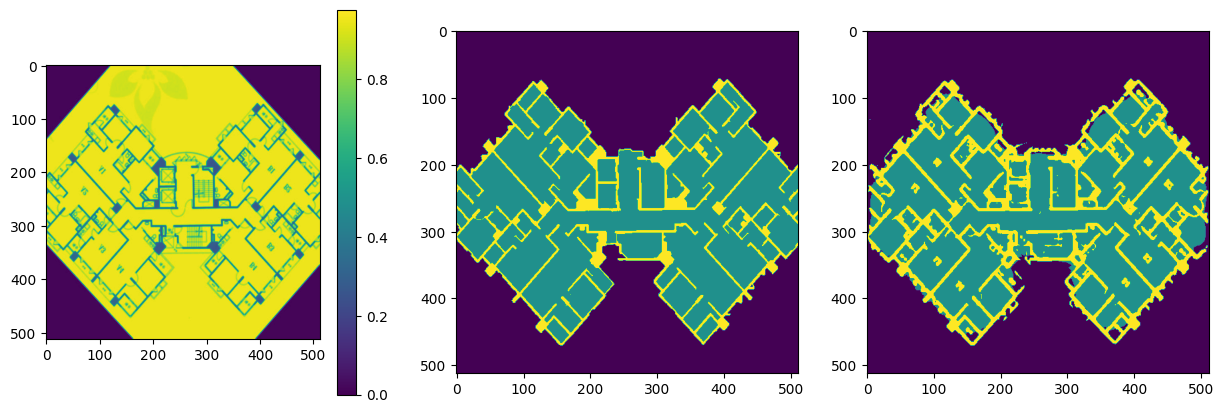

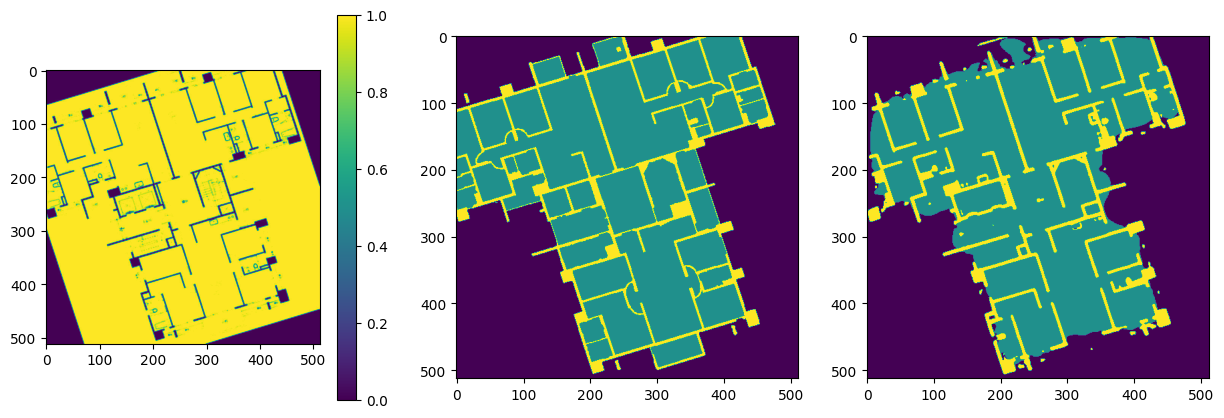

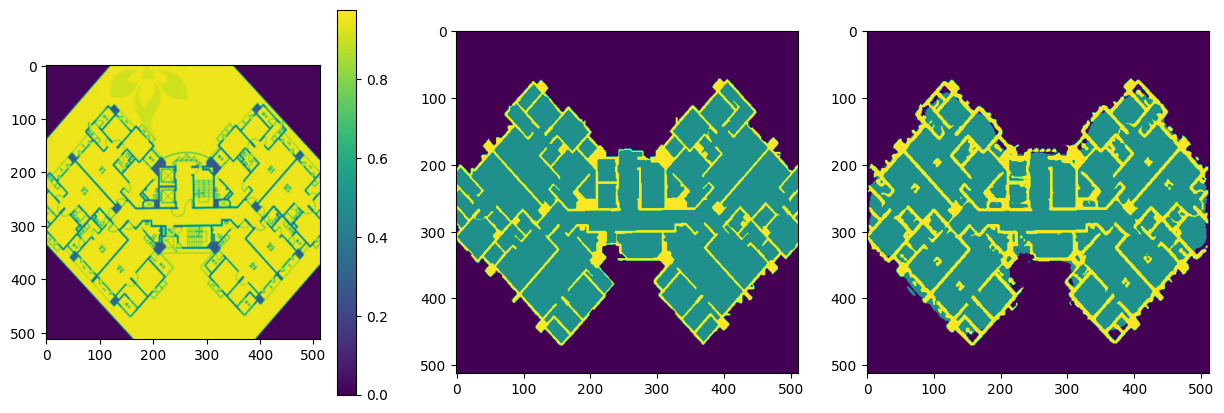

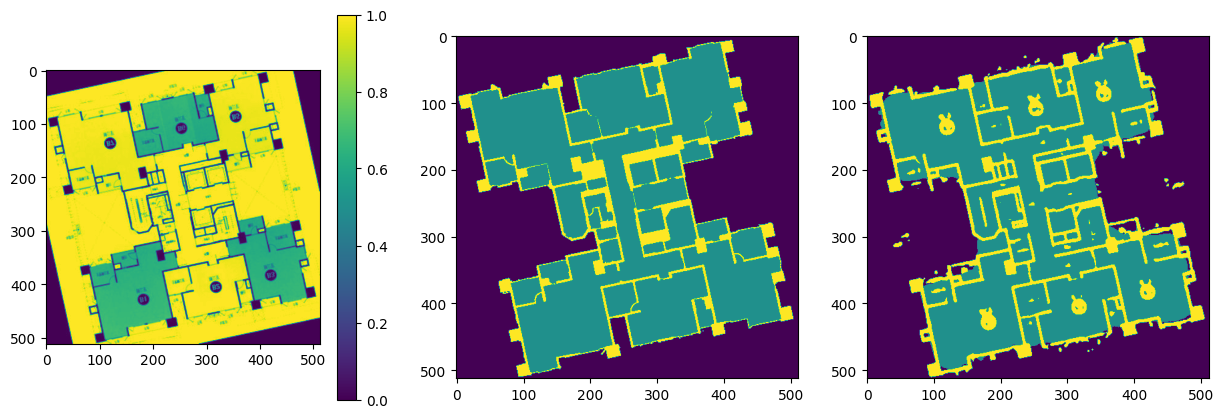

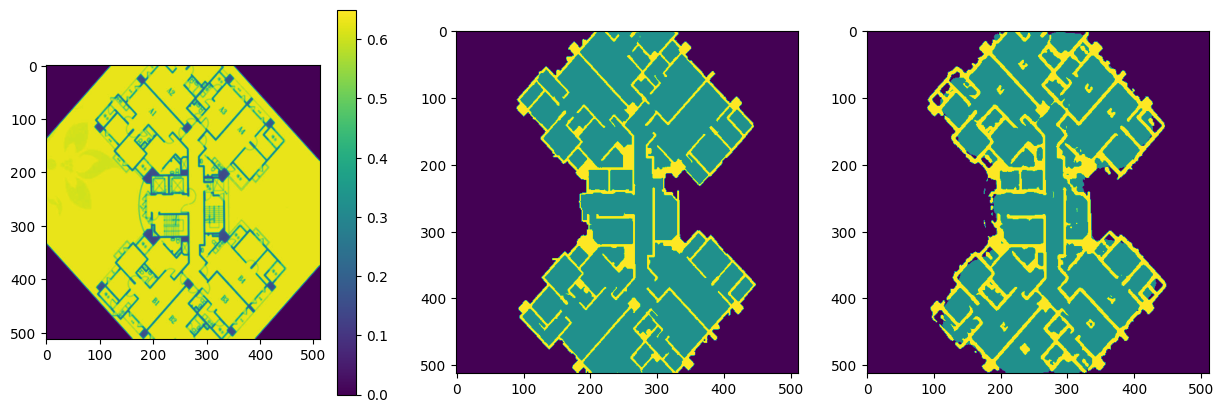

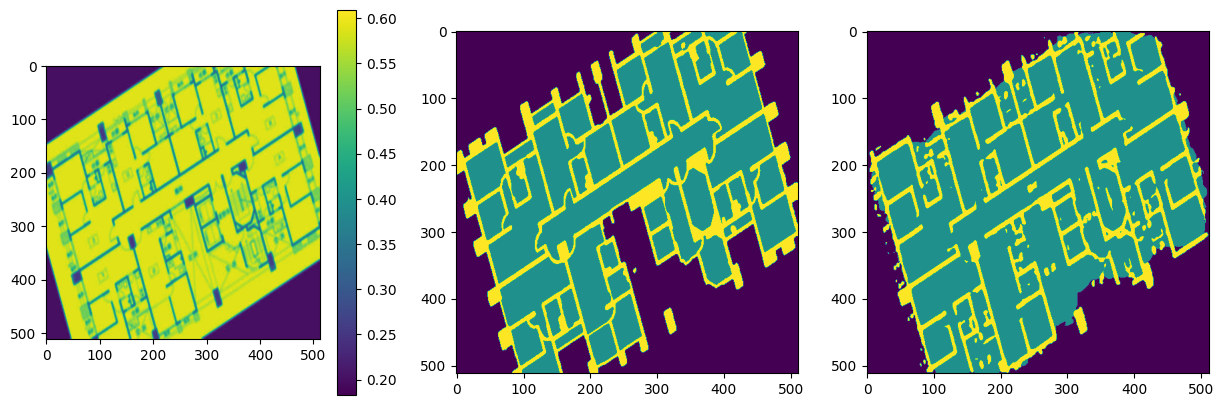

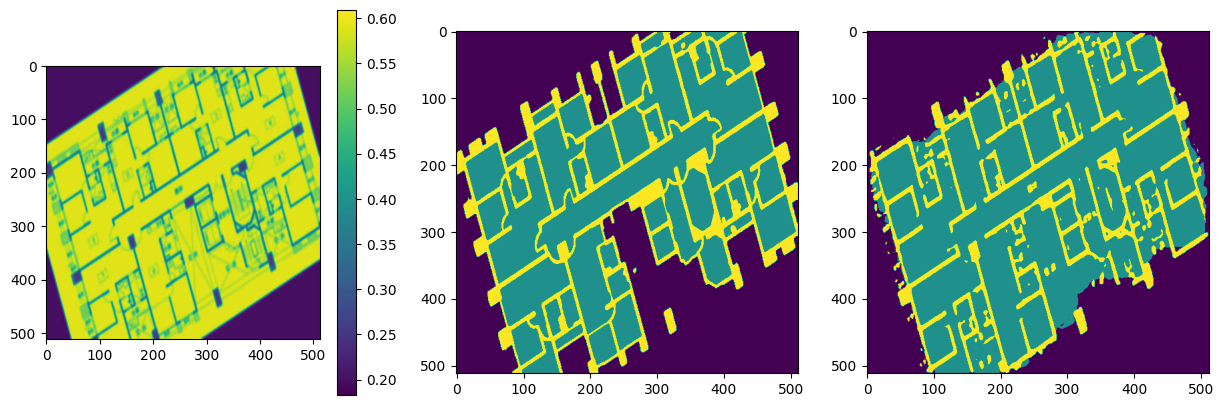

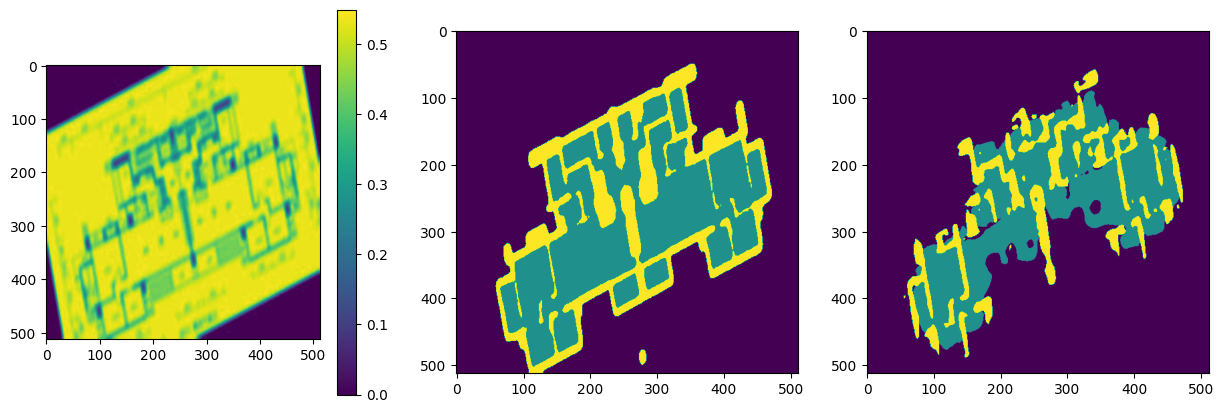

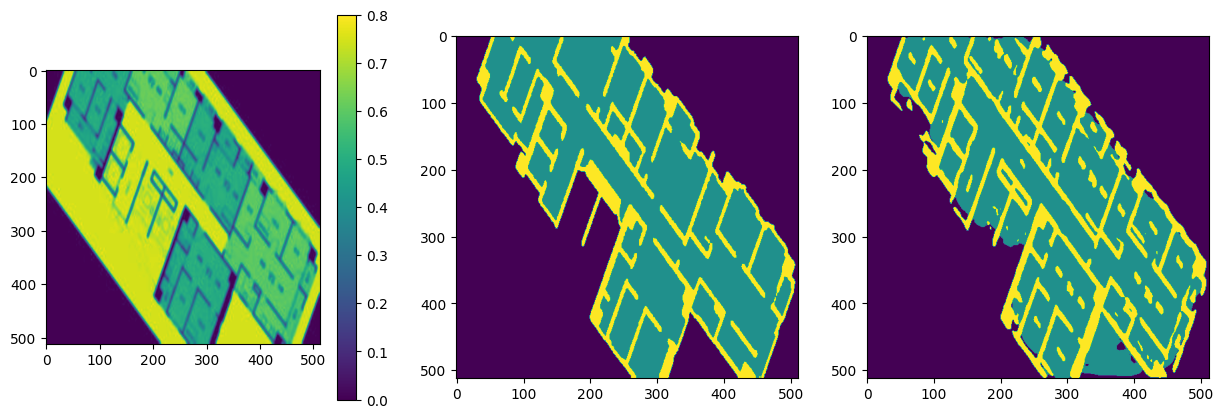

In [8]:
torch.cuda.empty_cache()
train_model.train('./result/')

In [9]:
for i in train_model.best_model.named_parameters('outc_weight',recurse=False):
    print(i)

('outc_weight.outc_weight', Parameter containing:
tensor([0.9693, 0.9778, 0.9832, 1.0196], device='cuda:0', requires_grad=True))


In [ ]:
dummy_input = torch.randn(4, 1, 512, 512).cuda()

torch.onnx.export(model, dummy_input, "unetplusplus.onnx", verbose=True, input_names=['input'], output_names=['output'])

d:\Folder\Vscode\Git\Airflow organization prediction\.venv\lib\site-packages\torch\onnx\utils.py:702: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx\constant_fold.cpp:181.)
  _C._jit_pass_onnx_graph_shape_type_inference(
d:\Folder\Vscode\Git\Airflow organization prediction\.venv\lib\site-packages\torch\onnx\utils.py:1209: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx\constant_fold.cpp:181.)
  _C._jit_pass_onnx_graph_shape_type_inference(


In [ ]:
test_data = train_model.test_loader

In [5]:
test_model = UNetplusplus(1,2)
test_model = model_setting(test_model,data,100,2,lr=1e-3,decay=1e-5)
test_model.dataset_split([0.8,0.15,0.05])

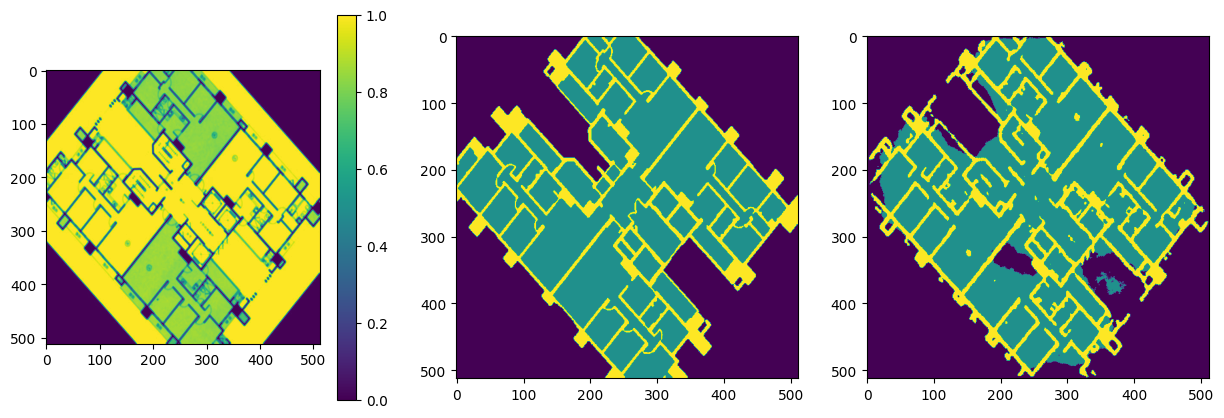

In [3]:
train_model.show_predict('val',path='./result/model_0.87.pth')